[0.0, 33.33333333333333, 33.333333333333336, 41.66666666666666, 46.66666666666665, 49.999999999999986, 57.14285714285714, 62.5, 66.66666666666667, 65.0]
[2, 102, 202, 302, 402, 502, 602, 702, 802, 902]


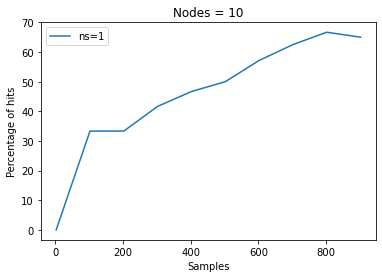

[0.0, 21.428571428571423, 30.952380952380953, 35.71428571428571, 43.57142857142857, 42.97619047619048, 43.9795918367347, 44.73214285714286, 44.52380952380952, 50.07142857142857]
[2, 102, 202, 302, 402, 502, 602, 702, 802, 902]
[0.0, 21.428571428571423, 21.69312169312168, 32.93650793650794, 37.46031746031746, 45.50264550264551, 53.28798185941043, 56.00198412698412, 56.72398589065255, 59.62301587301586]
[2, 102, 202, 302, 402, 502, 602, 702, 802, 902]
[0.0, 30.0, 31.904761904761894, 42.11038961038962, 42.259740259740255, 40.772005772005784, 47.804576376004945, 51.20400432900433, 56.62578162578163, 60.96320346320346]
[2, 102, 202, 302, 402, 502, 602, 702, 802, 902]


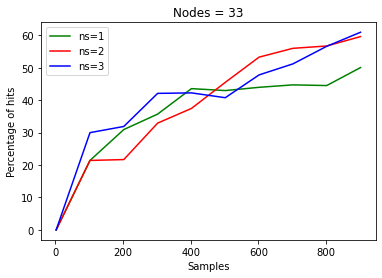

C:\Users\gisel\anaconda3\lib\site-packages\conditional_independence\suffstats\ci_suffstats\partial_correlation_suffstat.py:37: RuntimeWarning: invalid value encountered in sqrt
  rho = K/sqrt(diag(K))/sqrt(diag(K))[:, None]  # sample partial correlation matrix


In [ ]:
from causaldag import dci, dci_stability_selection
from causaldag.datasets import create_synthetic_difference
import numpy as np
import seaborn as sns
%matplotlib inline
import itertools as itr
import matplotlib
from matplotlib import pylab, mlab, pyplot
plt = pyplot

hits=[]
perc_hits=[]
samples=[]

def percentage(percent, whole):
  return (percent/whole) * 100.0

def causalInference (n, ns):
    hits=[]
    perc_hits=[]
    samples=[]
    for i in range (2,15000,50):
        for j in range(10):
            X1, X2, true_difference = create_synthetic_difference(nnodes=n, nsamples=i, num_added=ns, num_removed=ns, num_altered=ns)
            p = X1.shape[1]
            difference_matrix = dci(X1, X2, difference_ug=list(itr.combinations(range(p), 2)))
            ddag_edges = set(zip(*np.where(difference_matrix != 0)))
            same_values = set(true_difference) & set(ddag_edges)
            diff_values = set(ddag_edges) ^ set(true_difference)
            tot_values = set(ddag_edges) | set(true_difference)
            hits.append(percentage(len(same_values), len(tot_values)))
        perc_hits.append(np.mean(hits))
        samples.append(i)
    print(perc_hits)
    print(samples)
    return perc_hits, samples

p_hits=[]
s=[]
nodes = [10, 33, 55, 77, 100]
color = ['g','r','b']

for n in nodes:
    if n==10:
        ns=1
        p_hits, s = causalInference(n,ns)
        plt.plot(s,p_hits, label = "ns=1")
        plt.title("Nodes = 10")
        plt.xlabel("Samples")
        plt.ylabel("Percentage of hits")
        plt.legend()
        plt.show()
    elif n==33:
        ns = [1,2,3]
        for num, c in zip(ns,color):
            p_hits, s = causalInference(n,num)
            plt.plot(s,p_hits, label = ("ns=" + str(num)), color = c)
            plt.title("Nodes = 33")
            plt.xlabel("Samples")
            plt.ylabel("Percentage of hits")
            plt.legend()
        plt.show()
    elif n==55:
        ns = [2,4,6]
        for num, c in zip(ns,color):
            p_hits, s = causalInference(n,num)
            plt.plot(s,p_hits, label = ("ns=" + str(num)), color = c)
            plt.title("Nodes = 55")
            plt.xlabel("Samples")
            plt.ylabel("Percentage of hits")
            plt.legend()
        plt.show()
    elif n==77:
        ns = [3,5,7]
        for num, c in zip(ns,color):
            p_hits, s = causalInference(n,num)
            plt.plot(s,p_hits, label = ("ns=" + str(num)), color = c)
            plt.title("Nodes = 77")
            plt.xlabel("Samples")
            plt.ylabel("Percentage of hits")
            plt.legend()
        plt.show()
    elif n==100:
        ns = [3,6,10]
        for num, c in zip(ns,color):
            p_hits, s = causalInference(n,num)
            plt.plot(s,p_hits, label = ("ns=" + str(num)), color = c)
            plt.title("Nodes = 100")
            plt.xlabel("Samples")
            plt.ylabel("Percentage of hits")
            plt.legend()
        plt.show()



ns:  2 | color:  g


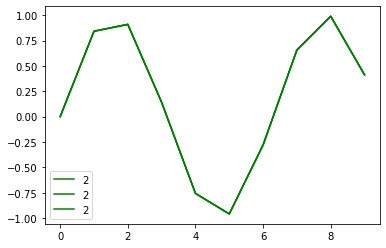

ns:  4 | color:  r


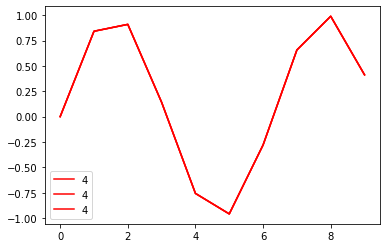

ns:  6 | color:  b


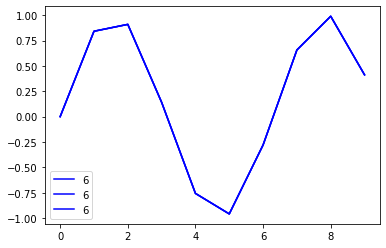

In [49]:
import numpy as np
import seaborn as sns
%matplotlib inline
import itertools as itr
import matplotlib
from matplotlib import pylab, mlab, pyplot
plt = pyplot
from pylab import *

# importar el módulo pyplot
import matplotlib.pyplot as plt



x1 = arange(10.)
x2 = arange(10.)
x3 = arange(10.)

y = sin(x1)

color = ['g','r','b']
ns = [2,4,6]


for num, c in zip(ns,color):
    print ("ns: ", num, "| color: ", c)
    plt.plot(x1,y, label = num, color = c)
    plt.plot(x2,y, label = num, color = c)
    plt.plot(x3,y, label = num, color = c)
    plt.legend()
    plt.show()
    

[12.065901011758271, 11.967724437211825, 11.871132633844498, 11.776087536696023, 11.682552290177389, 11.590491200420278, 11.499869689861871, 11.410654253943624, 11.32281241981011, 11.236312706900941, 11.340662117765984, 11.443441183847504, 11.3579785909883, 11.273783049172225, 11.19082658817758, 11.109082055027999, 11.391104665216337, 11.549076073914085, 11.466523707410053, 11.385143127513603, 11.53981677237491, 11.69232563564264, 11.784804262219133, 11.703473659995398, 11.851724925748227, 11.997957794417971, 11.91683569979716, 11.836803223640027, 11.980209028241047, 11.900817318312347, 11.82247092385341, 11.745149335077391, 11.831275720164609, 11.754895631590273, 12.107119948685055, 12.189292543021033, 12.27042431918936, 12.193203272498424, 12.325411715655617, 12.248808783923762, 12.58492896849907, 12.507673419275626, 12.53304860687411, 12.659187386294724, 12.703435804701627, 12.777112043139603, 12.899543378995434, 12.94158279060588, 12.86541102609378, 12.936415057538522, 12.861159588

[2, 3, 4, 5, 6, 7, 8, 9]


In [77]:
from causaldag import dci, dci_stability_selection
from causaldag.datasets import create_synthetic_difference
import numpy as np
%matplotlib inline
import itertools as itr
import matplotlib
from matplotlib import pylab, mlab, pyplot
plt = pyplot
from scipy.stats import bootstrap
import random
import sklearn


ns=1
nodes = 10
for i in range (2,1000,100):
    for j in range(10):
        X1, X2, true_difference = create_synthetic_difference(nnodes=nodes, nsamples=i, num_added=ns, num_removed=ns, num_altered=ns)
        p = X1.shape[1]
        difference_matrix = dci(X1, X2, difference_ug=list(itr.combinations(range(p), 2)))
        ddag_edges = set(zip(*np.where(difference_matrix != 0)))
        
# Bootstrapping
# Tenemos matriz de muestras X1 y X2 (nsamples, nnodes)
#X1 y X2 van a tener el mismo numero de filas, aunque por si en algún caso quisieramos probar algo distinto prefiero hacer la distinción.
number_of_rows1 = X1.shape[0]
number_of_rows2 = X2.shape[0]

# for n in n_reps:
n_reps = 10 #1000
for n in range(n_reps):
    random_rows1 = []
    random_rows2 = []
    accuracy1 = []
    accuracy2 = []
    #coger muestra aleatoria
    for i in range(number_of_rows1):
        #Elegimos un número de fila aleatoria
        row1 = np.random.choice(number_of_rows1, size=1, replace=True)
        row2 = np.random.choice(number_of_rows2, size=1, replace=True)
        #Hacemos un array con las filas aleatorias seleccionadas
        random_rows1.append(X1[row1, :])
        random_rows2.append(X2[row2, :])
    #Random_rows se queda como una array de arrays (array de 10 ints) --> ns como pasar esto para que se me queden como filas de X1p
    print(random_rows1)
    print(len(random_rows1))
    #X1p.append(np.asarray(random_rows1))
    #X2p.append(np.asarray(random_rows2))
    #print(X1.shape[0])
    #print(X1.shape[1])
    #print(np.asarray(random_rows1).shape[0])
    #print(np.asarray(X1p).shape[0])
    #print(X1)
    #X1p = [random_rows1, nodes]
    #print(np.asarray(X1p).shape[0])
    #print(X1p)
    #X2p = [random_rows2, nodes]
    
    # make predictions
    #resultss.append(dci(X1p, X2p))
    #print(results)
    
    # evaluate model
    #accuracy_score no tiene en cuenta el orden, quizá sería mejor idea comprobar el porcentaje de similitud entre predicciones y original como lo hice para las gráficas
    #score1 = accuracy_score(X1, X1p)
    #score2 = accuracy_score(X2, X2p)
    #accuracy1.append(score1)
    #accuracy2.append(score2)


# si un arco sale en todas ---: muy seguros
# si un arco sale en 33% extraemos 0.33

[array([[-2.54198867, -1.35982995,  1.50135449,  2.36247135,  2.37439067,
        -0.38351144,  0.82008078,  0.44632749, -0.52890497,  2.27680854]]), array([[ 0.17113036, -1.15981118,  1.37465123, -0.22199416,  2.55585405,
        -0.53682751,  0.80242004,  0.38722354, -2.38709185, -1.1470241 ]]), array([[ 0.27064531,  1.37540958,  2.16048012,  0.97845558,  0.32771287,
         0.81883515,  1.16231149,  1.55455619, -1.16364038,  0.20694072]]), array([[ 1.41251008,  3.32603665,  1.99688793,  0.13871549, -1.8853069 ,
         0.53044794,  0.43339661,  2.60105153,  0.18522487, -0.31647163]]), array([[ 0.65077332,  1.34639714,  0.69206325,  0.34442174,  0.00678455,
        -0.55061339,  0.57395308,  2.18382295,  0.70906541,  0.4067142 ]]), array([[ 0.74596414,  4.43950859,  1.279991  , -0.50658989, -0.55531874,
        -0.7849698 ,  0.70403785,  2.845859  , -0.24128257, -1.47430636]]), array([[ 2.87104309,  6.38186295,  1.19668646,  0.84068657, -3.85794928,
         2.44229057,  1.48631527

In [ ]:


    
"""import seaborn as sns
# plot distribution of accuracy
sns.kdeplot(accuracy)
plt.title("Accuracy across 1000 bootstrap samples of the held-out test set")
plt.xlabel("Accuracy")
plt.show()

# get median
median = np.percentile(accuracy, 50)

# get 95% interval
alpha = 100-95
lower_ci = np.percentile(accuracy, alpha/2)
upper_ci = np.percentile(accuracy, 100-alpha/2)

print(f"Model accuracy is reported on the test set. 1000 bootstrapped samples " 
      f"were used to calculate 95% confidence intervals.\n"
      f"Median accuracy is {median:.2f} with a 95% a confidence "
      f"interval of [{lower_ci:.2f},{upper_ci:.2f}].")

sns.kdeplot(accuracy)
plt.title("Accuracy across 1000 bootstrap samples of the held-out test set\n"
          "showing median with 95\\% confidence intervals")
plt.xlabel("Accuracy")
plt.axvline(median,0, 14, linestyle="--", color="red")
plt.axvline(lower_ci,0, 14, linestyle="--", color="red")
plt.axvline(upper_ci,0, 14, linestyle="--", color="red")
plt.show()"""

In [3]:
from causaldag import dci, dci_stability_selection
from causaldag.datasets import create_synthetic_difference
import numpy as np
import seaborn as sns
%matplotlib inline
import itertools as itr
import matplotlib
from matplotlib import pylab, mlab, pyplot
plt = pyplot

hits=[]
perc_hits=[]
samples=[]

def percentage(percent, whole):
  return (percent/whole) * 100.0

def causalInference (n, ns):
    hits=[]
    perc_hits=[]
    samples=[]
    for i in range (2,200,100):
        for j in range(10):
            X1, X2, true_difference = create_synthetic_difference(nnodes=n, nsamples=i, num_added=ns, num_removed=ns, num_altered=ns)
            p = X1.shape[1]
            difference_matrix = dci(X1, X2, difference_ug=list(itr.combinations(range(p), 2)))
            ddag_edges = set(zip(*np.where(difference_matrix != 0)))
            same_values = set(true_difference) & set(ddag_edges)
            diff_values = set(ddag_edges) ^ set(true_difference)
            tot_values = set(ddag_edges) | set(true_difference)
            hits.append(percentage(len(same_values), len(tot_values)))
        perc_hits.append(np.mean(hits))
        samples.append(i)
    print(perc_hits)
    print(samples)
    return perc_hits, samples


p_hits=[]
s=[]
nodes = [10, 33, 55, 77, 100]


for n in nodes:
    plt.title("Percentage of hits at 10%")
    plt.xlabel("Samples")
    plt.ylabel("Percentage of hits")
    plt.legend()
    if n==10:
        ns = 1
        p_hits, s = causalInference(n,num)
        plt.plot(s,p_hits, label = "nodes = 10", color = 'g')
    elif n==33:
        ns = 1
        p_hits, s = causalInference(n,num)
        plt.plot(s,p_hits, label = "nodes = 33", color = 'r')
    elif n==55:
        ns = 2
        p_hits, s = causalInference(n,num)
        plt.plot(s,p_hits, label = "nodes = 55", color = 'b')
    elif n==77:
        ns = 3
        p_hits, s = causalInference(n,num)
        plt.plot(s,p_hits, label = "nodes = 77", color = 'y')
    elif n==100:
        ns = 3
            p_hits, s = causalInference(n,num)
            plt.plot(s,p_hits, label = "nodes = 100", color = 'm')
    plt.show()


IndentationError: unexpected indent (4098270189.py, line 67)